In [146]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import rcParams

# Set up LaTeX rendering and style

rcParams["figure.dpi"] = 600
rcParams["text.usetex"] = True
rcParams["text.latex.preamble"] = r"\usepackage{amsmath}"
rcParams["font.size"] = 15

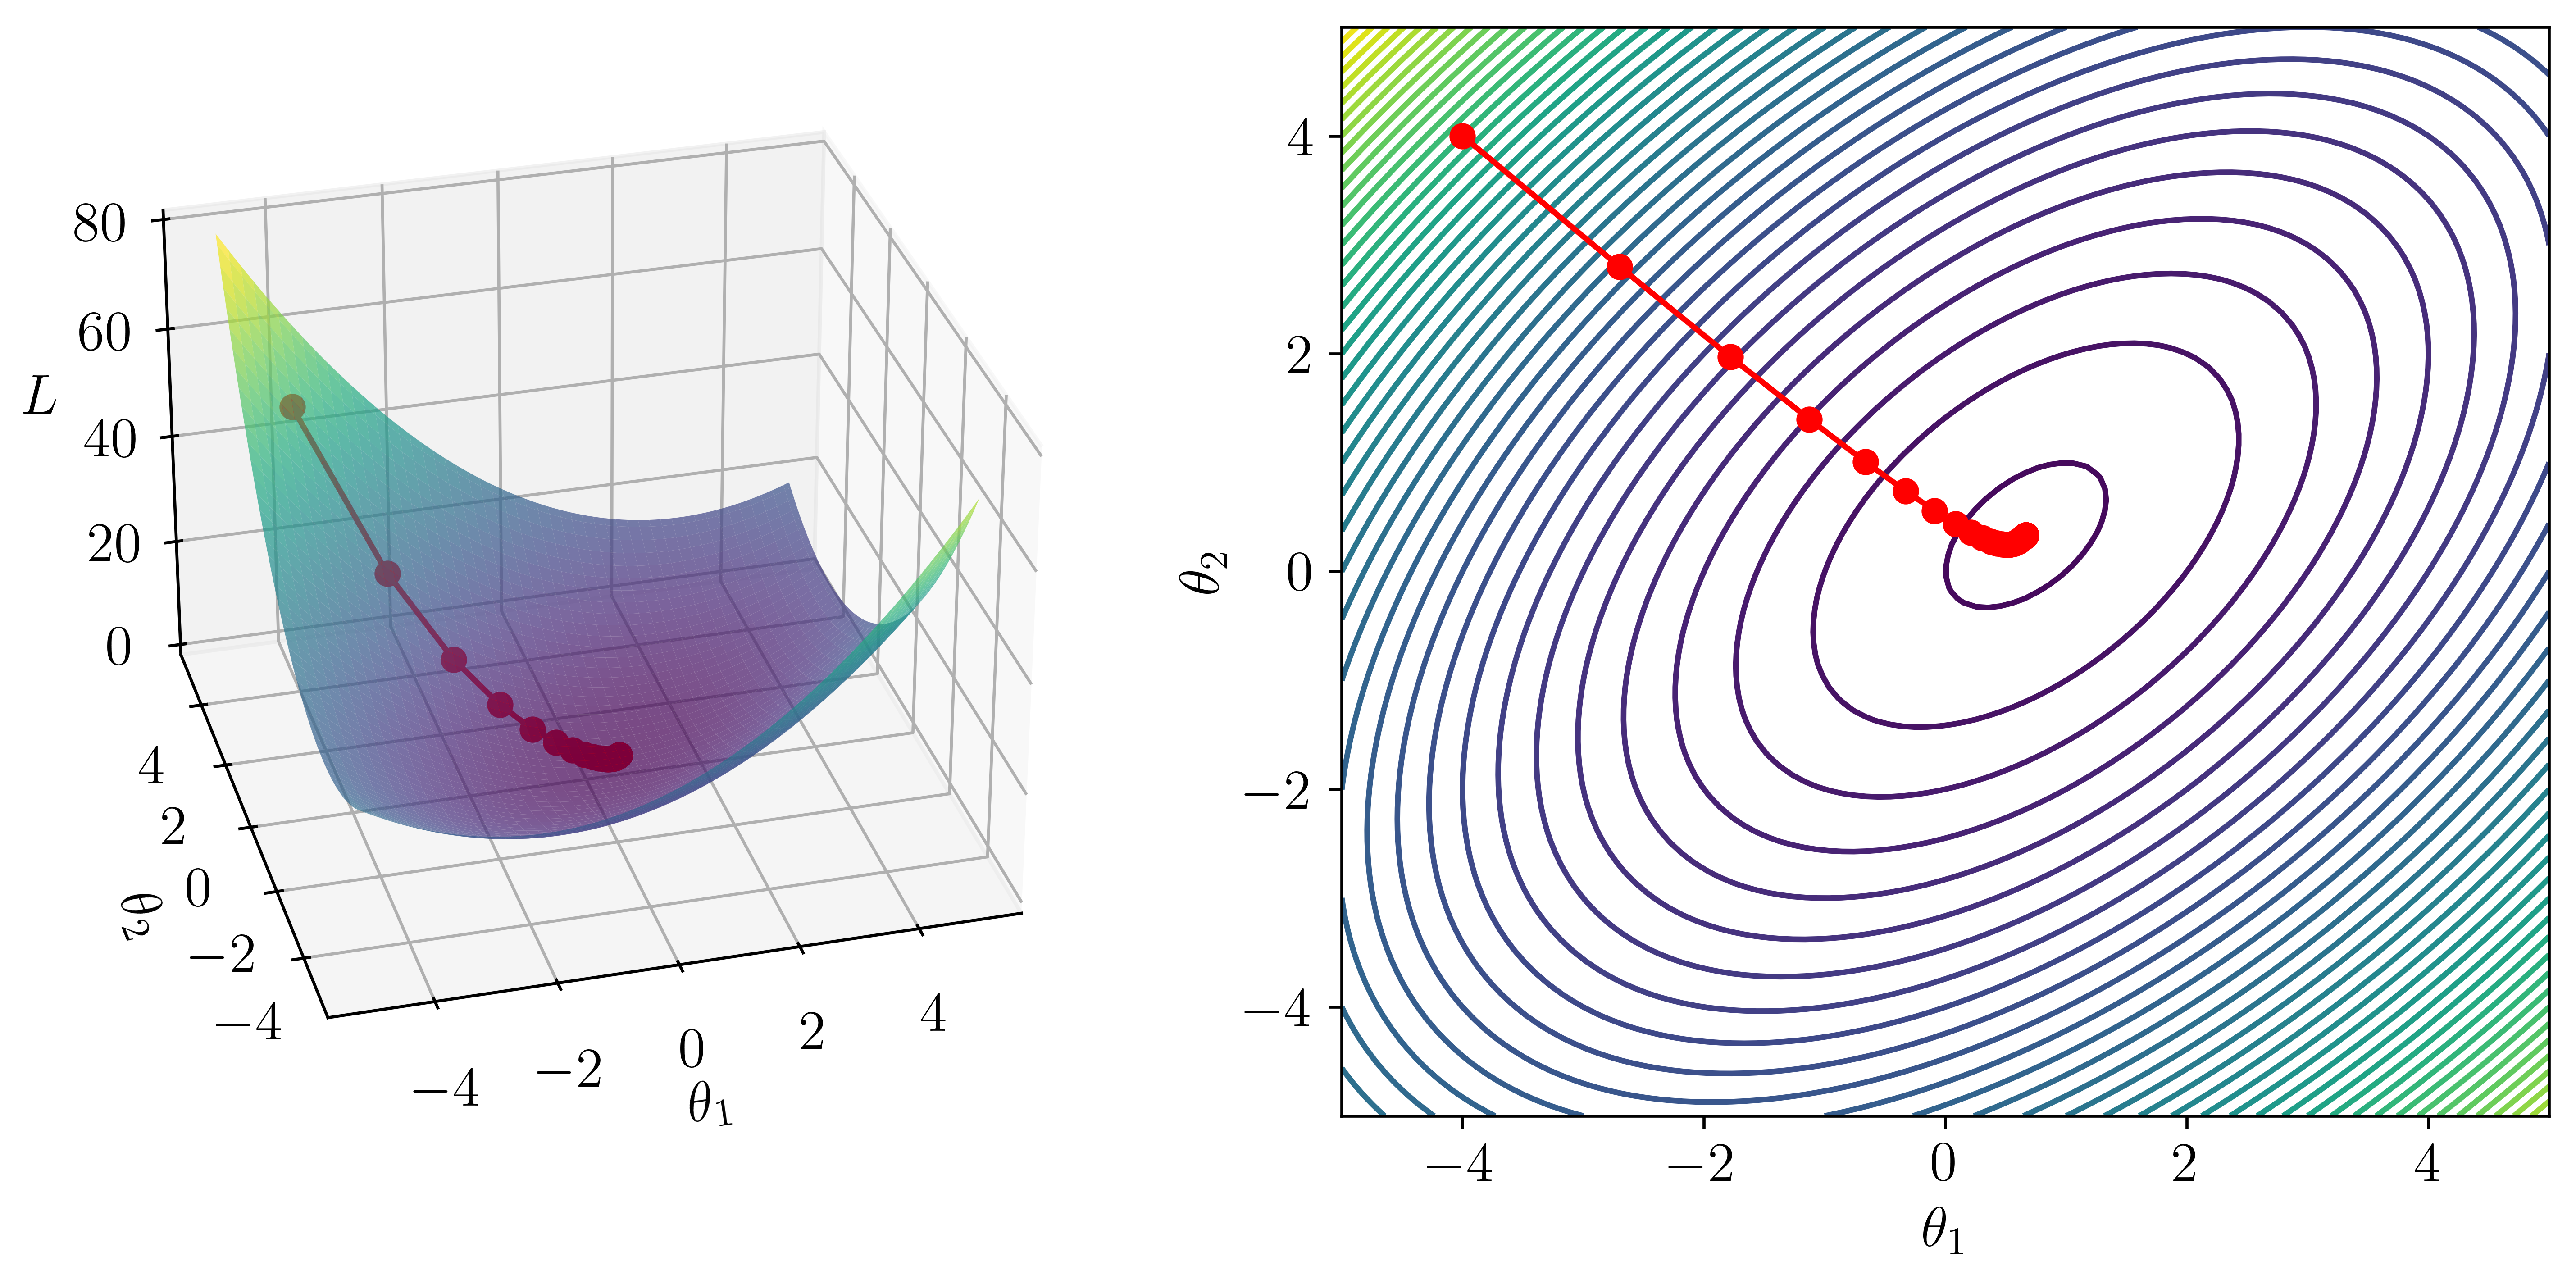

In [135]:
# illustration of gradient descent


def f(x, y):
    return x**2 + y**2 - x * y - x


def grad_f(x, y):
    return np.array([2 * x - y - 1, 2 * y - x])


def gradient_descent(starting_point, learning_rate, num_iterations):
    points = [starting_point]
    for _ in range(num_iterations):
        grad = grad_f(*points[-1])
        new_point = points[-1] - learning_rate * grad
        points.append(new_point)
    return np.array(points)


points = gradient_descent(
    starting_point=np.array([-4, 4]), learning_rate=0.1, num_iterations=100
)


# 3D plot of the function
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)
fig = plt.figure(figsize=(10, 5), tight_layout=True)

ax1 = fig.add_subplot(121, projection="3d")
ax2 = fig.add_subplot(122)

surf = ax1.plot_surface(
    X,
    Y,
    Z,
    cmap="viridis",
    edgecolor="none",
    alpha=0.7,
)
ax1.view_init(30, -105)

# plot gradient descent path
ax1.plot(
    points[:, 0],
    points[:, 1],
    f(points[:, 0], points[:, 1]),
    color="red",
    marker="o",
)

# set labels
ax1.set_xlabel(r"$\theta_1$")
ax1.set_ylabel(r"$\theta_2$")
ax1.set_zlabel(r"$L$")

# 2d contour plot
ax2.contour(X, Y, Z, levels=50, cmap="viridis")
ax2.plot(
    points[:, 0],
    points[:, 1],
    color="red",
    marker="o",
)
ax2.set_xlabel(r"$\theta_1$")
ax2.set_ylabel(r"$\theta_2$")

plt.savefig("figs/gradient_descent.png")

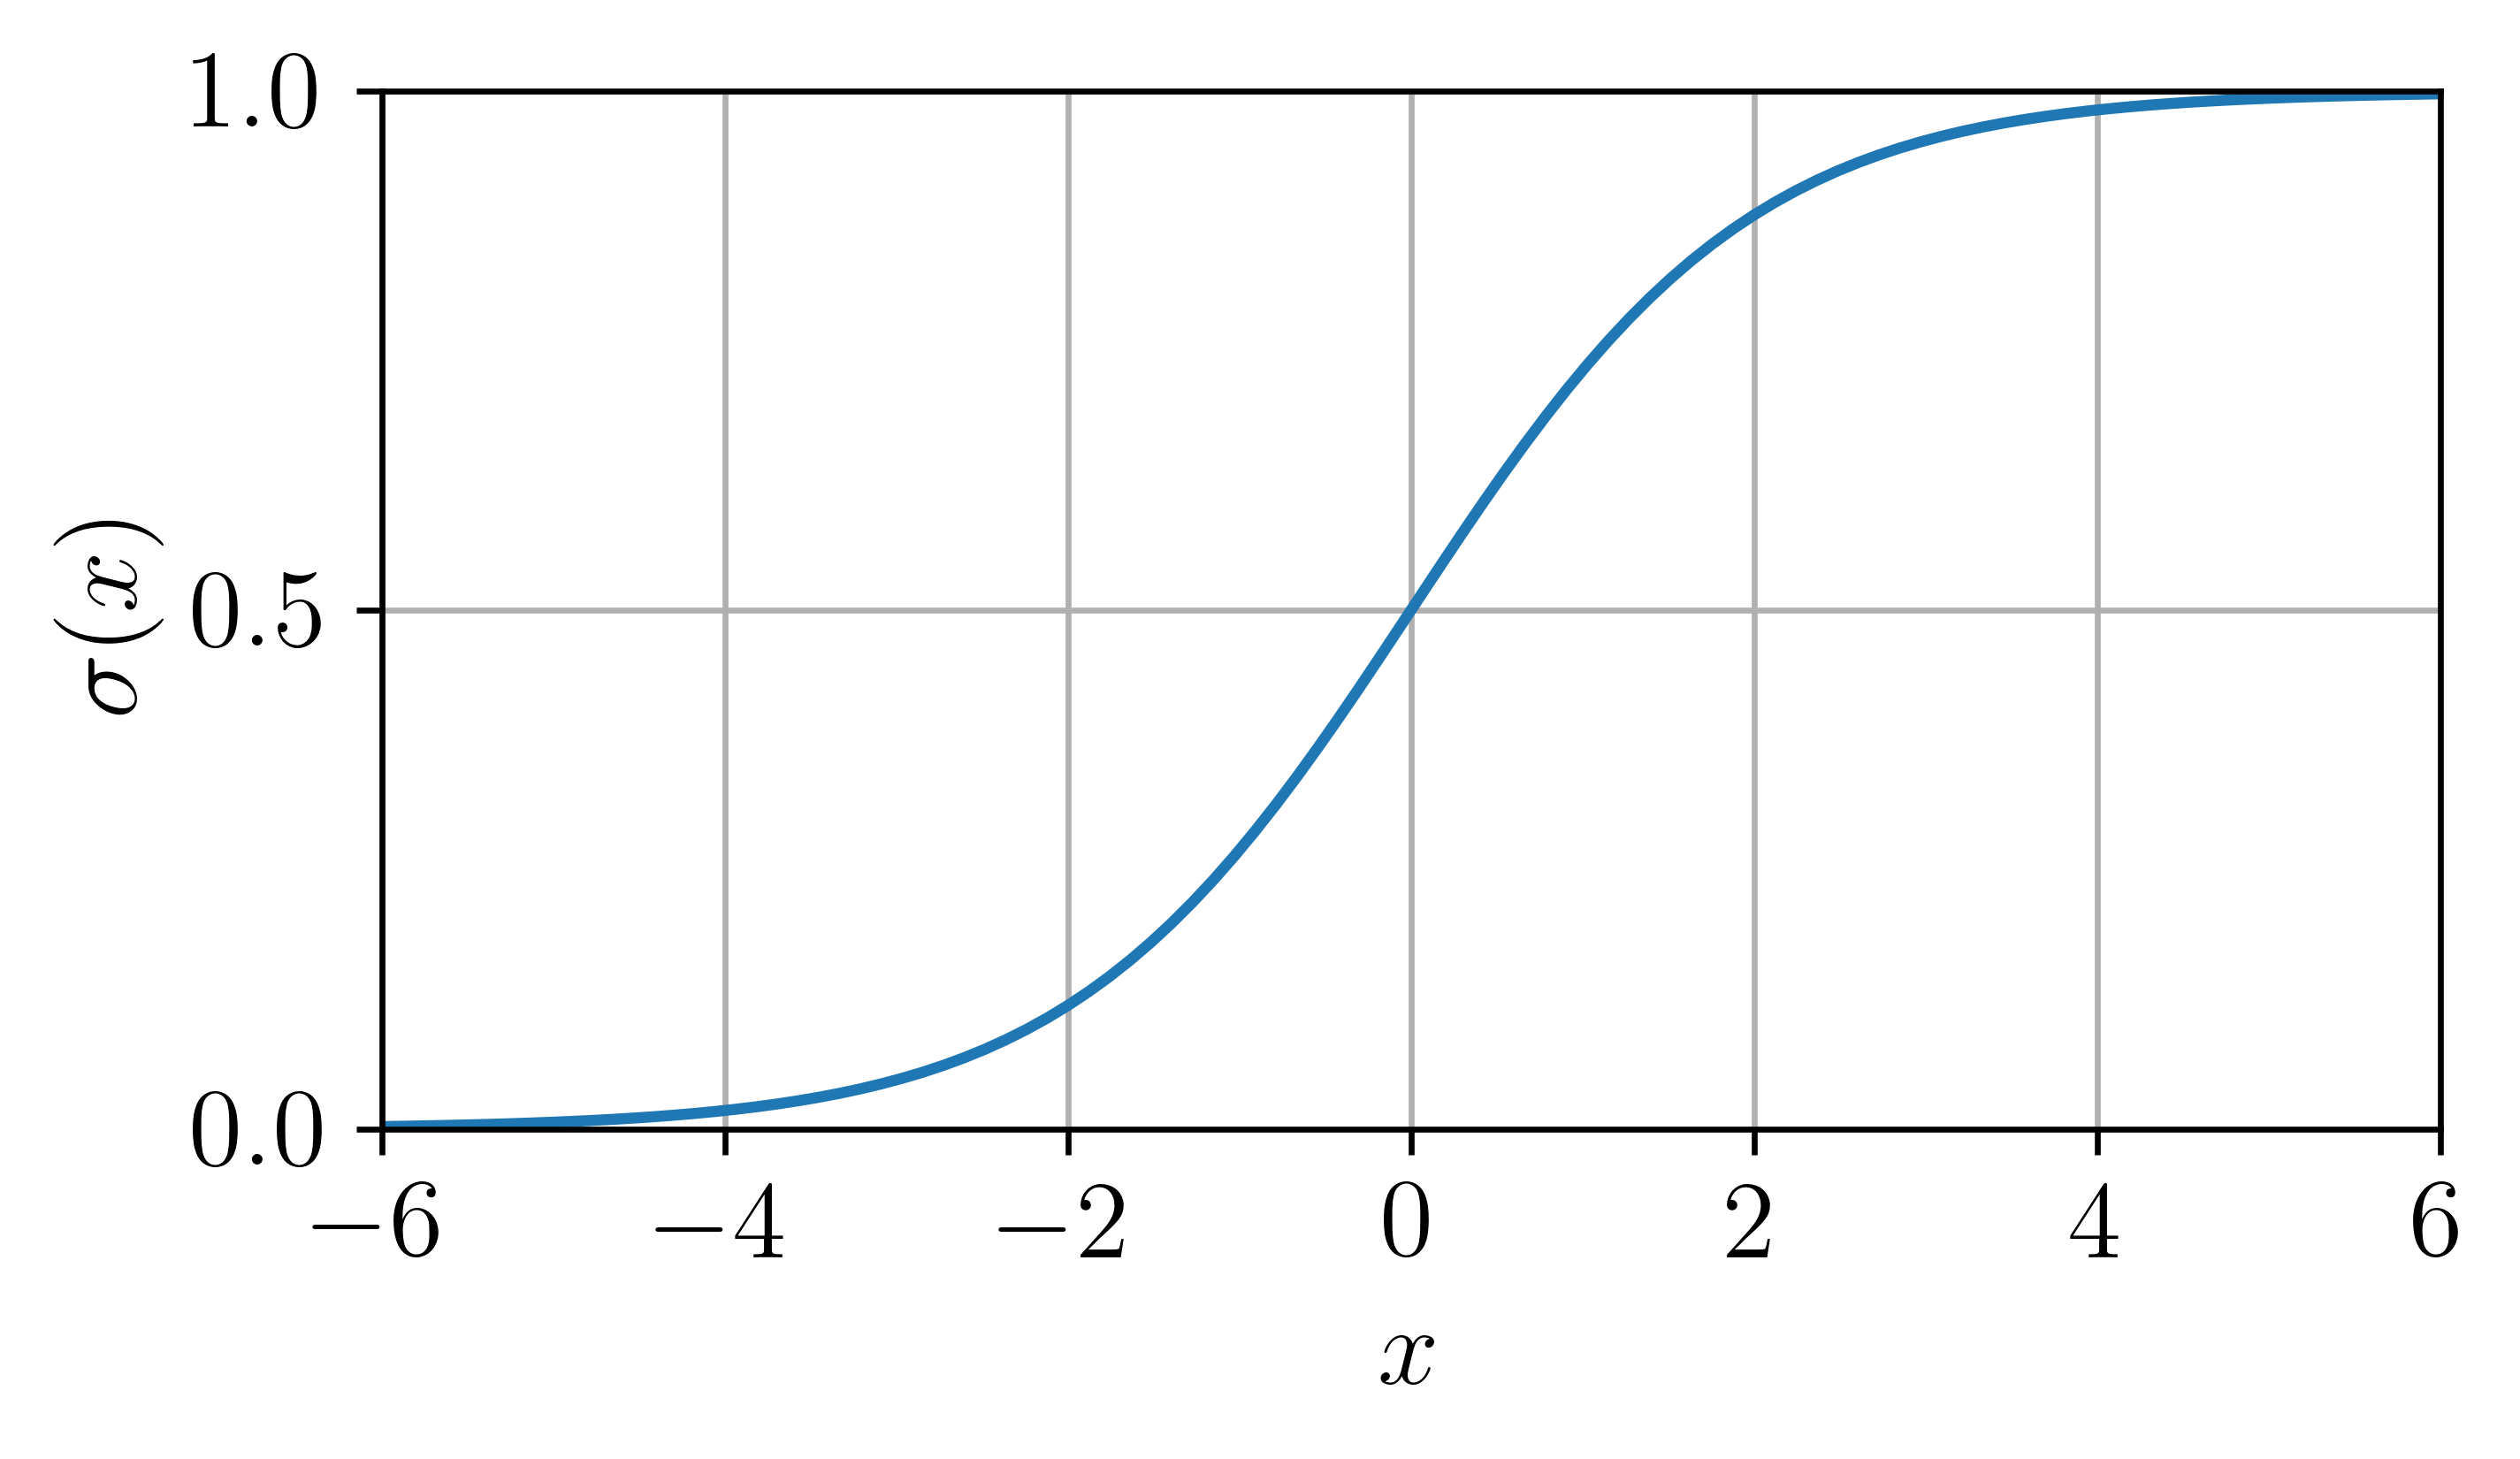

In [137]:
# sigmoid function


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


fig = plt.figure(figsize=(5, 3), tight_layout=True)
ax = fig.add_subplot(111)

x = np.linspace(-6, 6, 100)
y = sigmoid(x)


ax.grid()
ax.set_xticks([-6, -4, -2, 0, 2, 4, 6])
ax.set_yticks([0, 0.5, 1])
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$\sigma(x)$")

ax.set_xlim(-6, 6)
ax.set_ylim(0, 1)


ax.plot(x, y)

plt.savefig("figs/sigmoid.png")

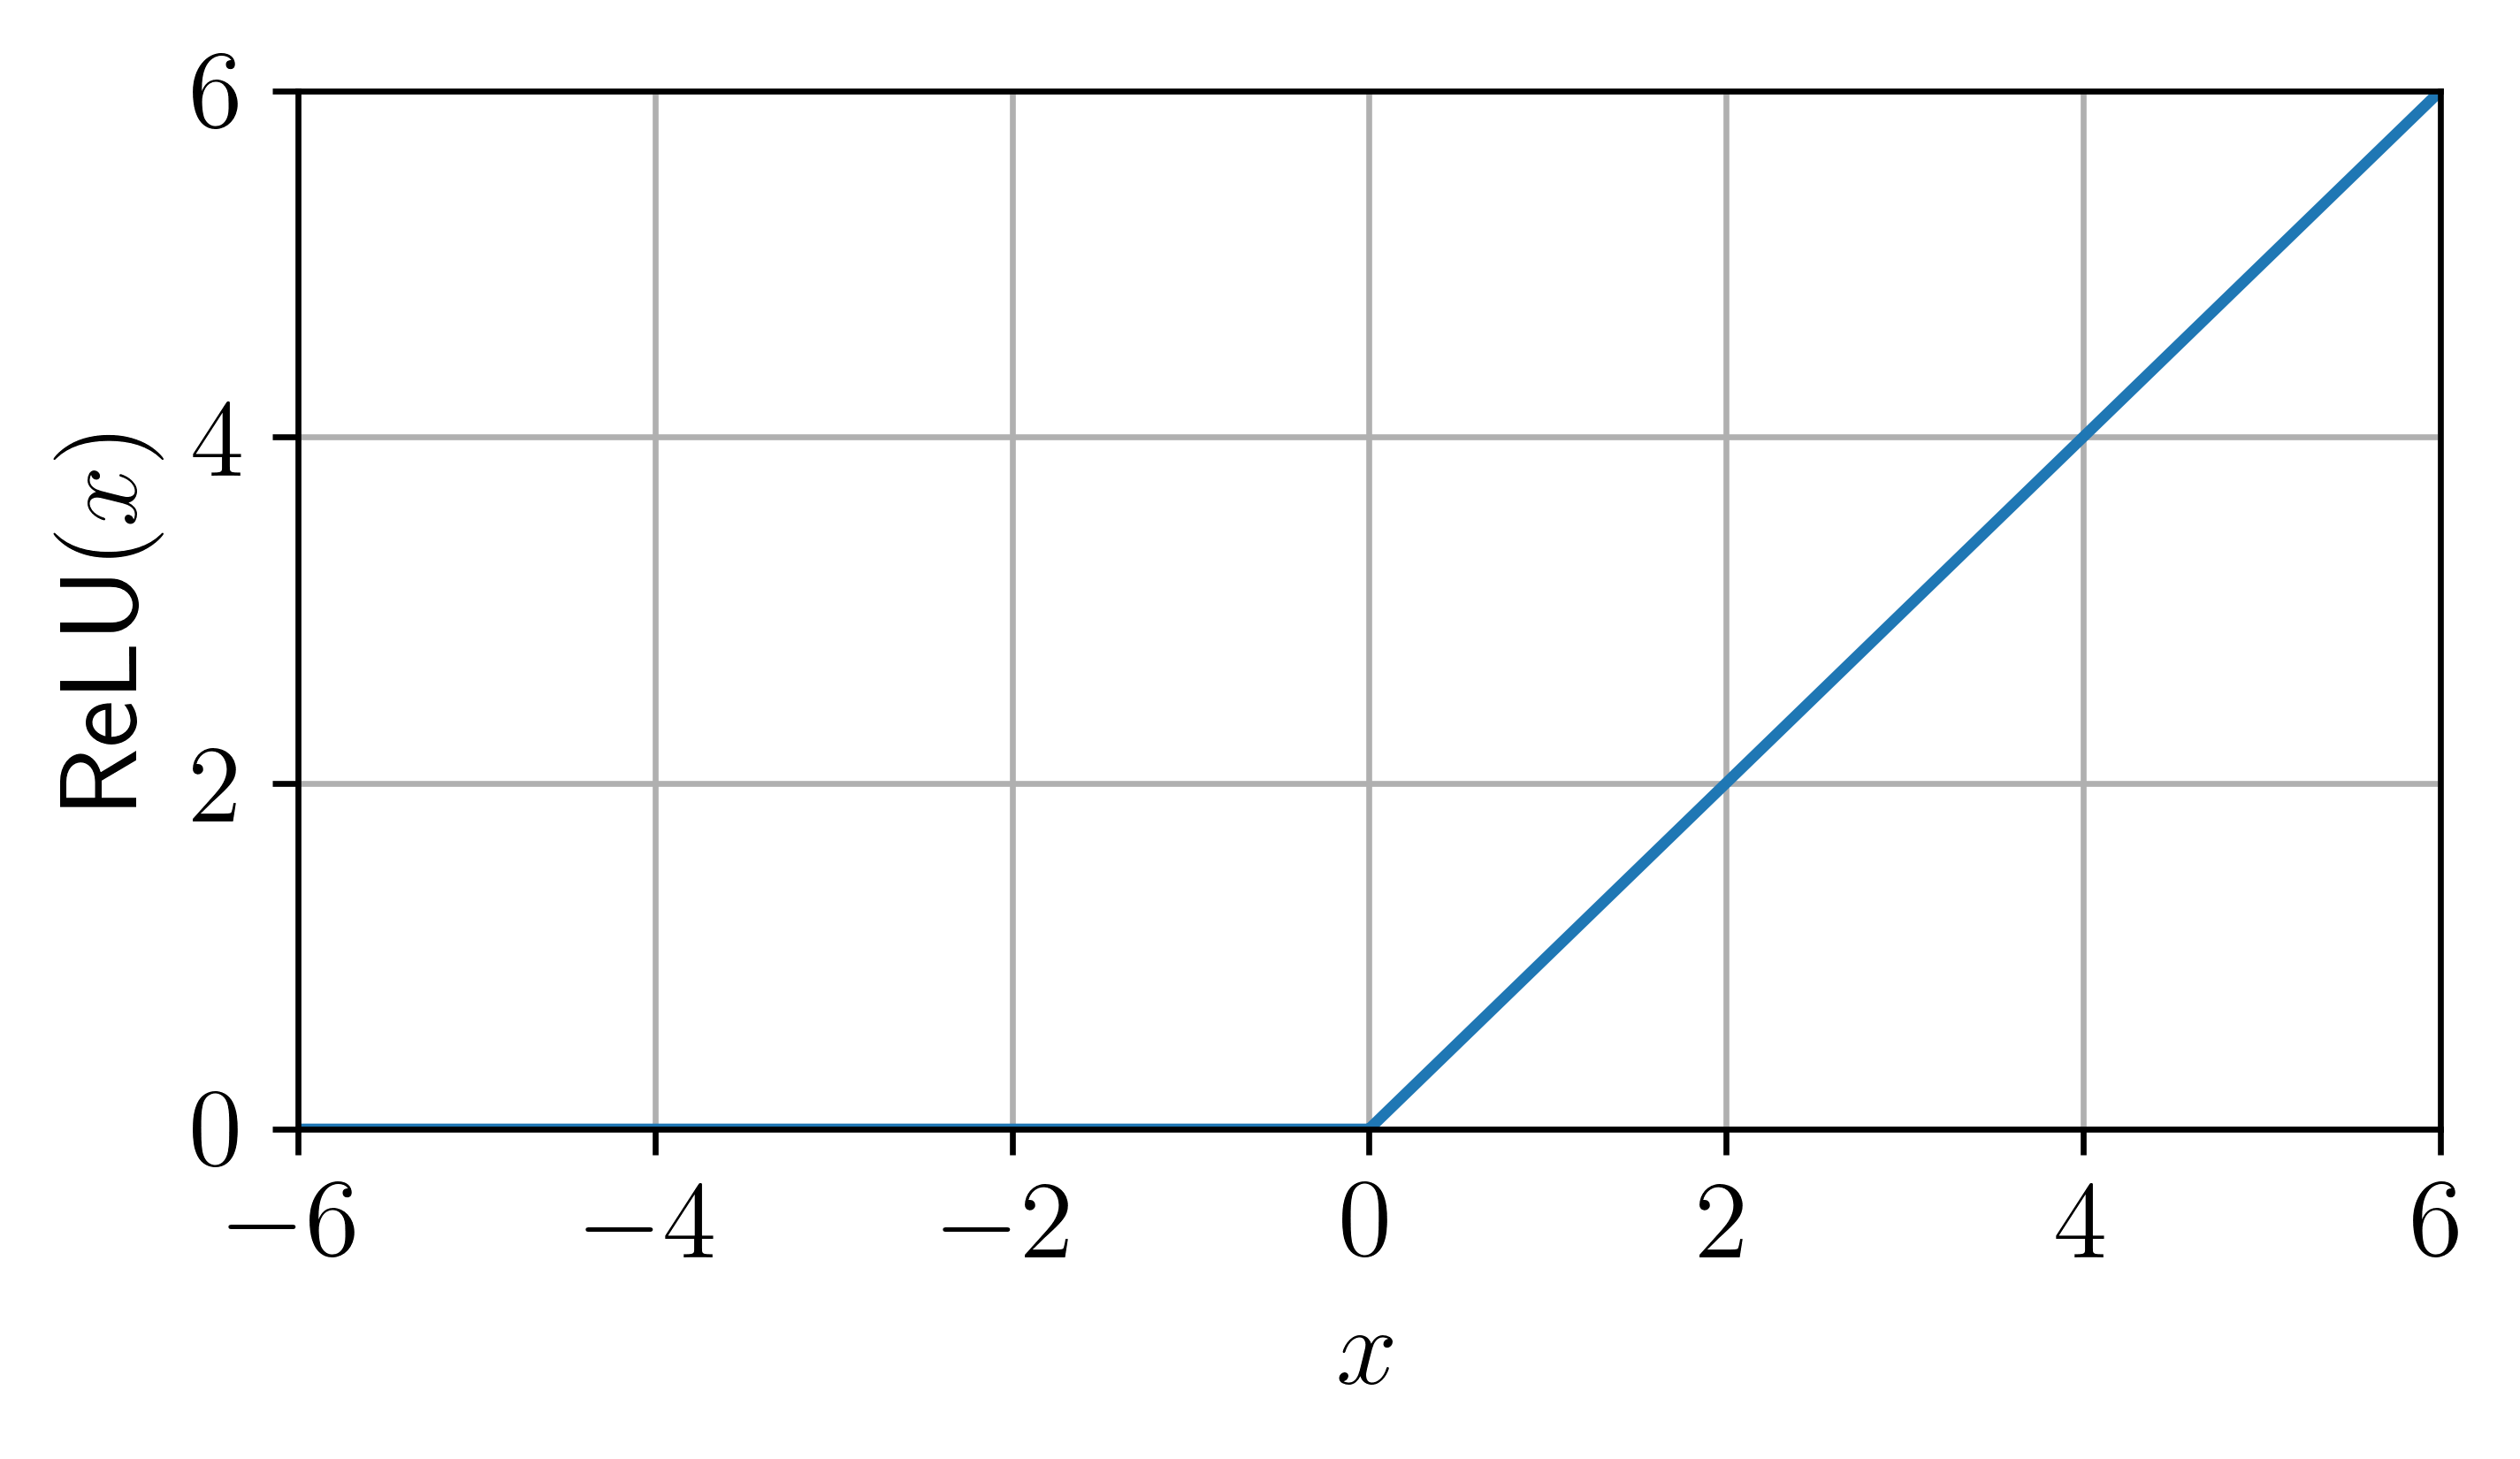

In [150]:
# ReLU function


def relu(x):
    return np.maximum(0, x)


fig = plt.figure(figsize=(5, 3), tight_layout=True)
ax = fig.add_subplot(111)

x = np.linspace(-6, 6, 1000)
y = relu(x)


ax.grid()
ax.set_xticks([-6, -4, -2, 0, 2, 4, 6])
ax.set_yticks([0, 2, 4, 6])
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$\text{ReLU}(x)$")

ax.set_xlim(-6, 6)
ax.set_ylim(0, 6)


ax.plot(x, y)

plt.savefig("figs/relu.png")